# Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Изучить:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

# Описание данных
#### Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь
#### Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа
#### Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

In [1]:
import pandas as pd

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders_log = pd.read_csv('/datasets/orders_log.csv')
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
costs = pd.read_csv('/datasets/costs.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Вывод
Данные выглядят ок. Пропусков, Nan нет. 
Нужно привести столбцы с датой/времени к типу datetime и привести имена столбцов к единому видц - нижний регистр, пробелы внутри имени меняем на символ "_"

In [8]:
visits_log.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits_log['end_ts'] =pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] =pd.to_datetime(visits_log['start_ts'])

visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
orders_log.columns = ['buy_ts', 'revenue', 'uid']
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
costs['dt'] =pd.to_datetime(costs['dt'], format="%Y-%m-%d")
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


## Построить отчёты и посчитать метрики
#### Продукт
- Сколько людей пользуются в день, неделю, месяц? DAU, WAU, MAU
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

Работать будем с таблицей visits_log. Добавим столбцы для года, месяца, недели, даты а также продолжительность сессии.

In [11]:
visits_log['visit_year'] = visits_log['start_ts'].dt.year
visits_log['visit_month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['visit_week'] = visits_log['start_ts'].astype('datetime64[W]')
visits_log['visit_date'] = visits_log['start_ts'].dt.date
visits_log['visit_duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

first_visit_date = visits_log.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits_log = visits_log.join(first_visit_date, on='uid')

visits_log.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00


Ого, что это?! Сессии нулевой  длины. Посмотрим сколько их.

In [12]:
visits_log[visits_log['visit_duration'] == 0]['visit_duration'].count()

35794

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: visit_duration, dtype: float64

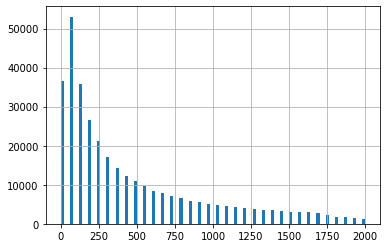

In [13]:
visits_log['visit_duration'].hist(bins=100, range=(0,2000));
visits_log['visit_duration'].describe()

Таких визитов почти 10% от общего числа. Впрочем, у нас значения времени округлены до минут, то есть, скорее всего, в нулевые значения попали визиты менее минуты. Тем не менее, вряд ли можно сказать, что человек "пользовался продуктом", если зашел туда менее чем на минуту. Избавимся от таких визитов. Сделаем срез посещений с ненулевой продолжительностью.

In [14]:
visits_with_duration = visits_log.query('visit_duration > 0')
visits_with_duration['visit_duration'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: visit_duration, dtype: float64

Настораживают безумные значения в 84480 секунд. Вряд ли кто-то провел на Яндекс.Афише сутки.

In [15]:
import numpy as np
np.percentile(visits_with_duration['visit_duration'], 99)

4680.0

99% визитов уложились в 78 минут. Откинем визиты продолжительностью больше 1,5 часов. Это или ошибка в базе или кто-то просто открыл страницу Афиши и ушел, оставив компьютер включенным.

In [16]:
visits_with_duration[visits_with_duration['visit_duration'] > 5400]['device'].describe()

count        2101
unique          2
top       desktop
freq         1889
Name: device, dtype: object

In [17]:
visits_good_time = visits_with_duration.query('visit_duration < 5400').reset_index()
visits_good_time['visit_duration'].describe()

count    321429.000000
mean        665.365888
std         792.970452
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max        5340.000000
Name: visit_duration, dtype: float64

#### Теперь, на хороших данных можем считать метрики по количеству уникальных пользователей - DAU, WAU, MAU.

In [18]:
visits_good_time['first_visit_month'] = visits_good_time['first_visit_date'].astype('datetime64[M]')
visits_good_time['cohort_lifetime'] = ((visits_good_time['visit_month'] - visits_good_time['first_visit_month']) / np.timedelta64(1,'M')).round().astype(int)

In [19]:
dau_device = visits_good_time.groupby(['device', 'visit_date']).agg({'uid': 'nunique'}).reset_index()
wau_device = visits_good_time.groupby(['device', 'visit_year', 'visit_week']).agg({'uid': 'nunique'}).reset_index()
mau_device = visits_good_time.groupby(['device', 'visit_year', 'visit_month']).agg({'uid': 'nunique'}).reset_index()

dau_source = visits_good_time.groupby(['source_id', 'visit_date']).agg({'uid': 'nunique'}).reset_index()
wau_source = visits_good_time.groupby(['source_id', 'visit_year', 'visit_week']).agg({'uid': 'nunique'}).reset_index()
mau_source = visits_good_time.groupby(['source_id', 'visit_year', 'visit_month']).agg({'uid': 'nunique'}).reset_index()

dau_total = visits_good_time.groupby(['visit_date']).agg({'uid': 'nunique'}).reset_index()
wau_total = visits_good_time.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'}).reset_index()
mau_total = visits_good_time.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'}).reset_index()

dau_source['source_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


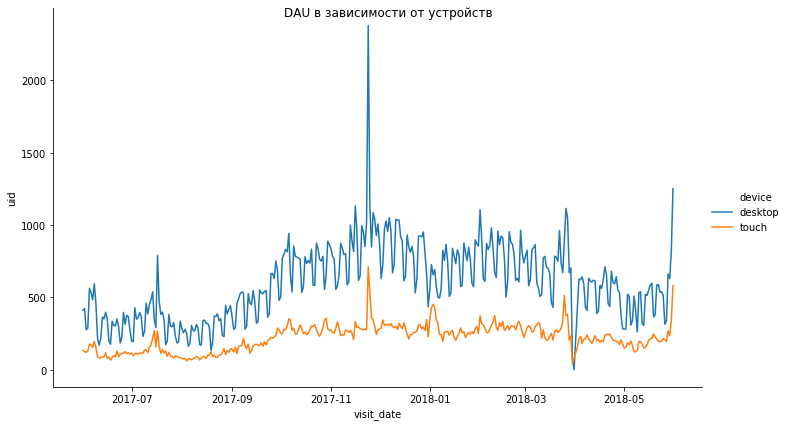

In [21]:
ax_dau = sns.relplot(x="visit_date", y="uid", hue="device", kind="line", data=dau_device, height=6, aspect=10/6);
ax_dau.fig.suptitle("DAU в зависимости от устройств");

Дневной график показывает нам что по субботам-воскресеньям наблюдается вполне объяснимое падение числа визитов. Все-таки билеты на мероприятия редко покупают в последний момент, а пик мероприятий как раз приходится на конец недели. Интересно, что для десктопов это падение намного более ярко выражено. Похоже, что наши клиенты используют для поиска билетов свои рабочие компьютеры!

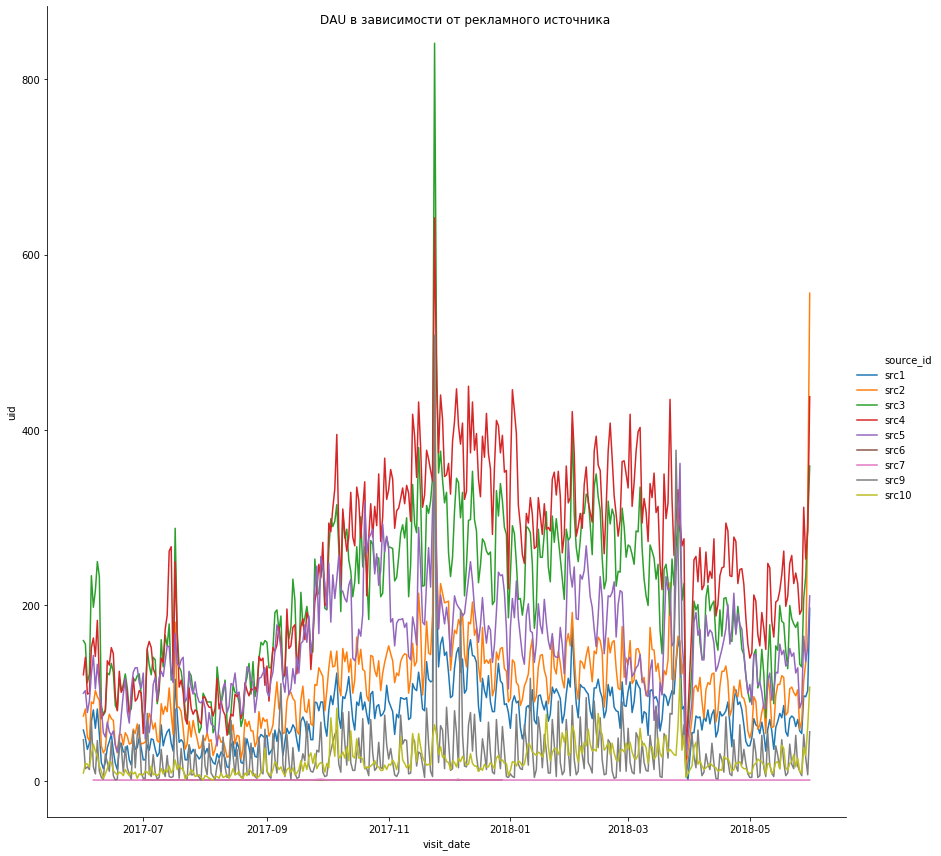

In [22]:
dau_source['source_id'] = dau_source['source_id'].apply(lambda x: 'src{}'.format(x))
ax_dau = sns.relplot(x="visit_date", y="uid", hue="source_id", kind="line", data=dau_source, height=12, aspect=10/10);
ax_dau.fig.suptitle("DAU в зависимости от рекламного источника");

Здесь тоже видим эти еженедельные колебания,  в остальном графики схожие.

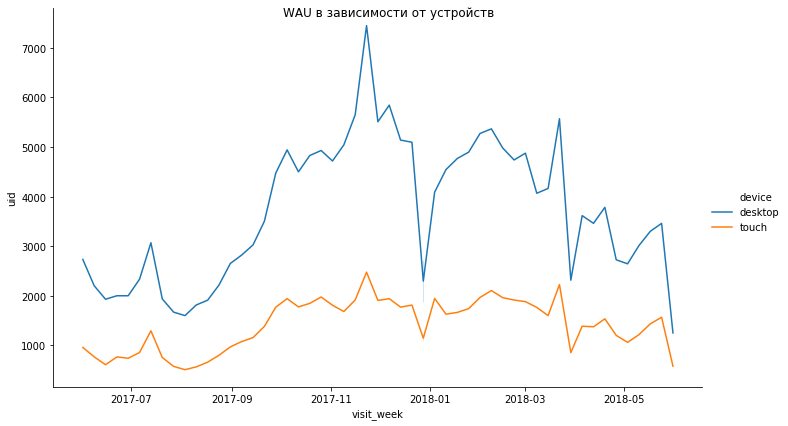

In [23]:
ax_wau = sns.relplot(x="visit_week", y="uid", hue="device", kind="line", data=wau_device, height=6, aspect=10/6);
ax_wau.fig.suptitle("WAU в зависимости от устройств");

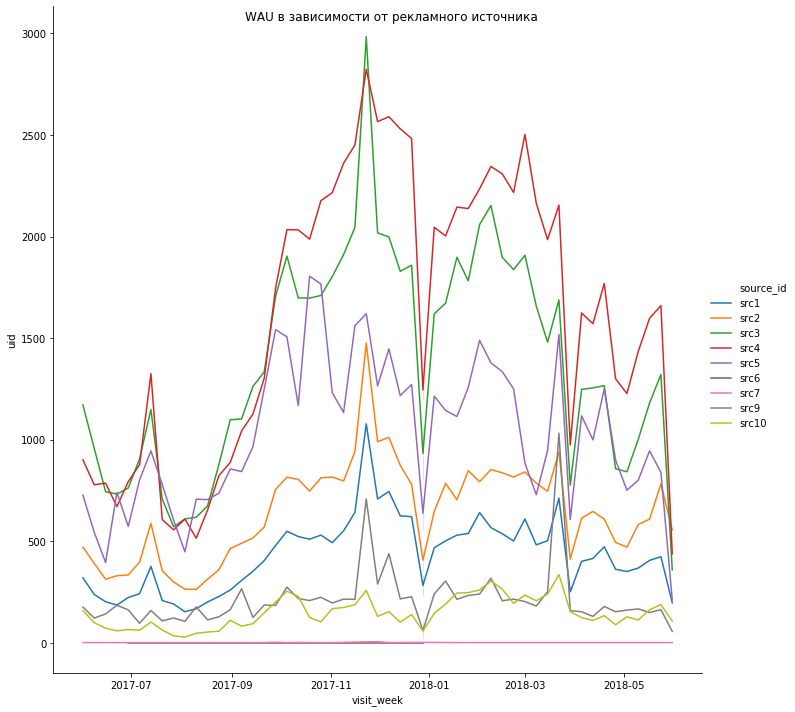

In [24]:
wau_source['source_id'] = wau_source['source_id'].apply(lambda x: 'src{}'.format(x))
ax_wau = sns.relplot(x="visit_week", y="uid", hue="source_id", kind="line", data=wau_source, height=10, aspect=10/10);
ax_wau.fig.suptitle("WAU в зависимости от рекламного источника");

На недельных графиках хорошо различим провал на новогодних праздниках. Зато у нас пики в начале декабря и перед майскими праздниками - люди готовят программу на длинные выходные заранее.
Так же видно,что в зимний период сервис значительно популярнее, чем летом. А также видим, что за год число визитов подросло в полтора раза, несмотря на то, что график заканчивается июньским падением.

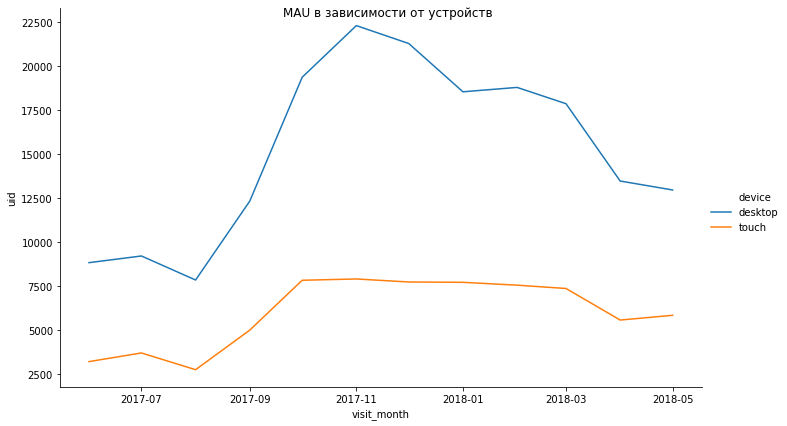

In [25]:

ax_mau = sns.relplot(x="visit_month", y="uid", hue="device", kind="line", data=mau_device, height=6, aspect=10/6);
ax_mau.fig.suptitle("MAU в зависимости от устройств");

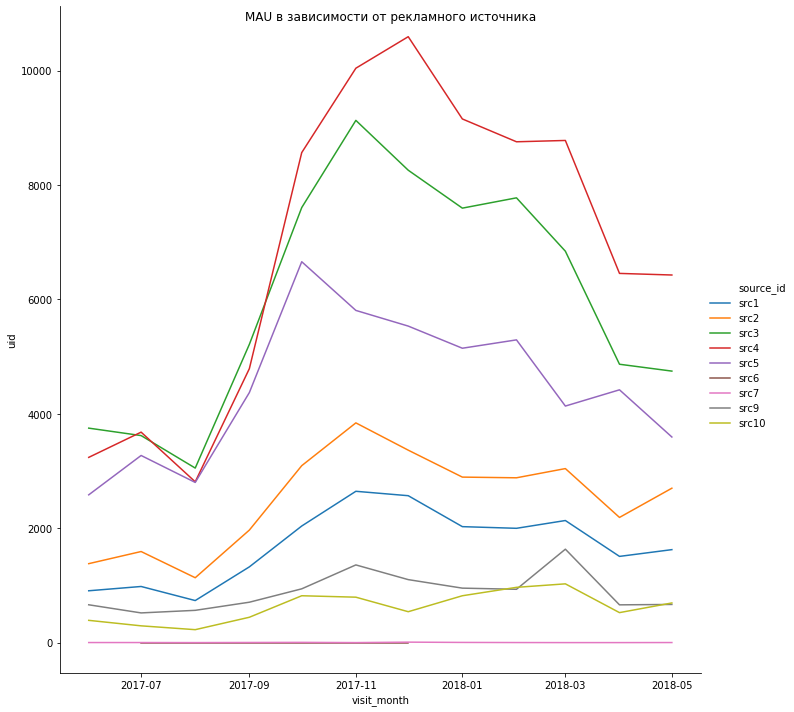

In [26]:
mau_source['source_id'] = mau_source['source_id'].apply(lambda x: 'src{}'.format(x))
ax_mau = sns.relplot(x="visit_month", y="uid", hue="source_id", kind="line", data=mau_source, height=10, aspect=10/10);
ax_mau.fig.suptitle("MAU в зависимости от рекламного источника");

По месячным графикам более очевиден рост за год. Также интересно, что источник 4 начинал год на 2м месте, а закончил с большим отрывом на первом, да еще и показал рост в два раза! Зато источник 7 показывает стабильный 0 в течение всего года. Интересно, что может быть настолько неэффективным - телефонные обзвоны?

In [27]:
dau = visits_good_time.groupby(['visit_date']).agg({'uid': 'nunique'})['uid'].mean()
wau = visits_good_time.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'})['uid'].mean()
mau = visits_good_time.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'})['uid'].mean()
print('DAU = {:.0f}'.format(dau))
print('WAU = {:.0f}'.format(wau))
print('MAU = {:.0f}'.format(mau))

DAU = 815
WAU = 5053
MAU = 20921


#### - Сколько сессий в день

In [28]:
visits_per_day_device = visits_good_time.groupby(['device','visit_date']).agg({'start_ts': 'count'}).reset_index()
visits_per_day_source = visits_good_time.groupby(['source_id','visit_date']).agg({'start_ts': 'count'}).reset_index()
visits_per_day_device.head()

,device,visit_date,start_ts
0,desktop,2017-06-01,452
1,desktop,2017-06-02,459
2,desktop,2017-06-03,298
3,desktop,2017-06-04,308
4,desktop,2017-06-05,619


In [29]:
visits_per_day_device['start_ts'].describe()

count     727.000000
mean      442.130674
std       301.911465
min         1.000000
25%       224.000000
50%       322.000000
75%       643.000000
max      2822.000000
Name: start_ts, dtype: float64

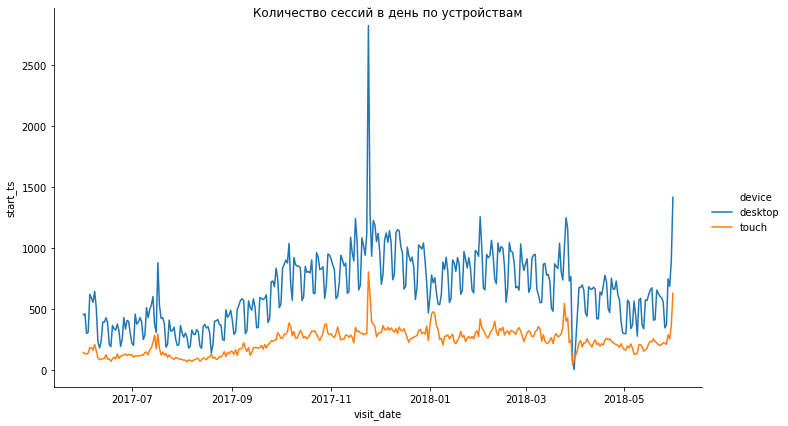

In [30]:
ax = sns.relplot(x="visit_date", y="start_ts", kind="line", hue="device", data=visits_per_day_device, height=6, aspect=10/6);
ax.fig.suptitle("Количество сессий в день по устройствам");

Интересные выбросы вверх и вниз. Что это за даты?

In [31]:
visits_per_day_device[visits_per_day_device['start_ts'] == visits_per_day_device['start_ts'].min()]

,device,visit_date,start_ts
303,desktop,2018-03-31,1


In [32]:
visits_per_day_device[visits_per_day_device['start_ts'] == visits_per_day_device['start_ts'].max()]

,device,visit_date,start_ts
176,desktop,2017-11-24,2822


Минимальное значение  - 1 посещение 31.03.18, максимум - 3625 31 ноября 2017.

In [33]:
visits_per_day_source['source_id'] = visits_per_day_source['source_id'].apply(lambda x: 'src{}'.format(x))

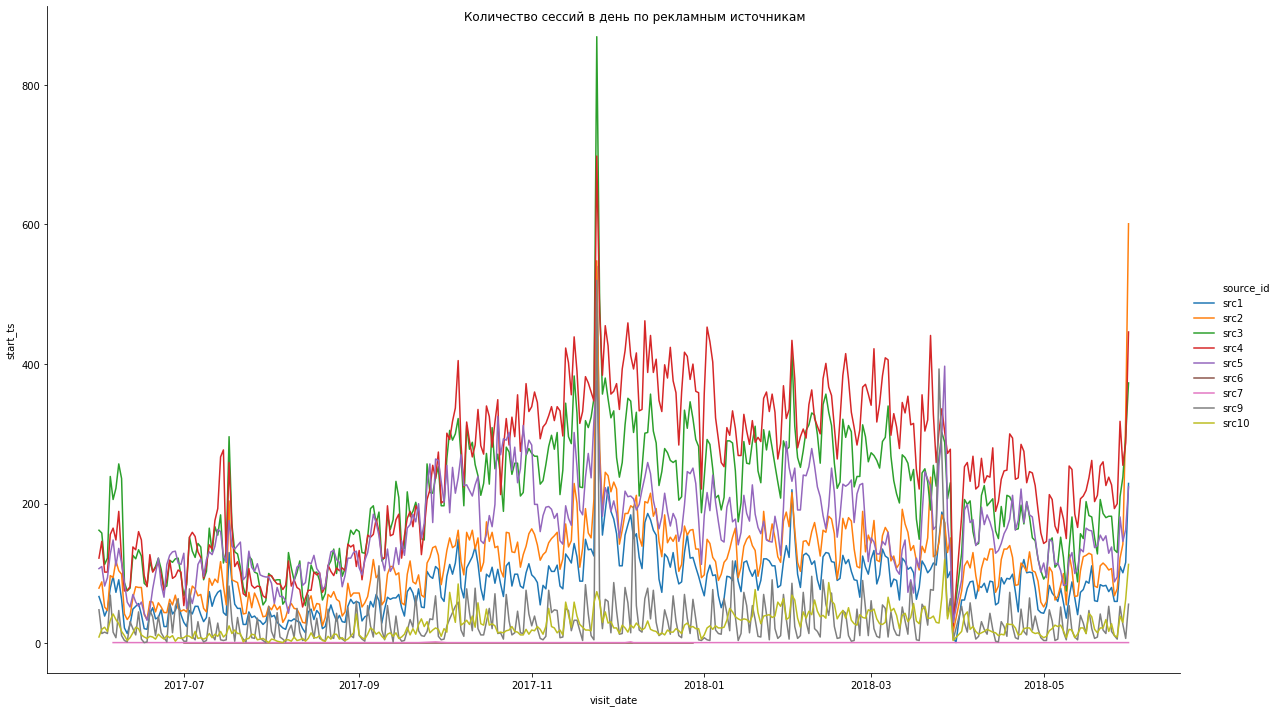

In [34]:
ax = sns.relplot(x="visit_date", y="start_ts", kind="line", hue="source_id", data=visits_per_day_source, height=10, aspect=10/6);
ax.fig.suptitle("Количество сессий в день по рекламным источникам");

Если отсутствие запросов в какой-то день можно объяснить проблемами в работе сервиса, то всплеск в 6 раз от обычного значения - появление на рынке каких-то особенно желанных билетов. предположил бы, что это билеты на Чемпионат мира по футболу 2018, но они продавались только через сайт ФИФА.
В остальном графики мало отличаются от аналогичных для DAU. То есть нет большой разницы между количеством уникальных пользователей и визитов вообще.

#### Сколько длится одна сессия? (ASL)

In [35]:
visits_good_time.head()

,index,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_visit_date,first_visit_month,cohort_lifetime
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
3,5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0
4,6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,2018-01-01,2018-01-25,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,7


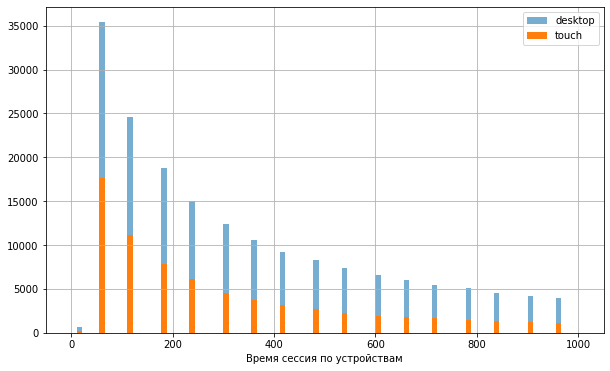

count    321429.000000
mean        665.365888
std         792.970452
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max        5340.000000
Name: visit_duration, dtype: float64

In [36]:
visits_good_time[visits_good_time['device'] == 'desktop']['visit_duration'].hist(bins=90, label='desktop', figsize=(10,6), range=(0, 1000), alpha=0.6);
visits_good_time[visits_good_time['device'] == 'touch']['visit_duration'].hist(bins=90, label='touch', figsize=(10,6), range=(0, 1000));
plt.xlabel('Время сессия по устройствам')
plt.legend(loc='upper right')
plt.show()
visits_good_time['visit_duration'].describe()

#### Вывод
Очень много коротких сессий (это при том, что 10% сессий нулевой длины мы уже выкинули, столбец, соответствующий визитом длительностью 120 секунд дает четверть всех значений. То есть люди приходят и сразу же покидают сайт. Возможно, пользователи не могут разобраться в дизайне сайта или приложения, стоит проверить тепловую карту 

Так как у нас после отбрасывания недостоверных сессий (нулевой длины и очень долгих) распределение получилось очень близкое к нормальному, то "типичную" длину я бы взял исходя из медианы - 360 секунд = 6 минут.

#### Как часто люди возвращаются? Рассчитаем Retention rate по месяцам, устройствам и источникам

In [37]:
visits_good_time.head(3)

,index,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_visit_date,first_visit_month,cohort_lifetime
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2


In [38]:
#профили пользователей
users = (visits_good_time.sort_values(by=['uid', 'start_ts'])
         .groupby('uid').agg({'start_ts': 'first', 'source_id': 'first', 'device': 'first'})  
         .rename(columns={'start_ts':'acquisition_ts'})        )

users['acquisition_date'] = users['acquisition_ts'].dt.date
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')
costs = costs.rename(columns={'dt':'acquisition_date'})
users = (users.reset_index().set_index(['source_id', 'acquisition_date'])
         .join(costs.set_index(['source_id', 'acquisition_date']), how='left'))

#сколько потратили на пользователя
user_cost = (users.groupby(['source_id','acquisition_date'])
            .agg({'device': 'count', 'costs':'max'}).rename(columns={'device': 'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']

users = users.join(user_cost[['acquisition_cost']], how='left').reset_index()


users = users.set_index('uid')[['acquisition_ts', 'acquisition_date', 'acquisition_month', 'source_id', 
                                'device', 'acquisition_cost']]

#платит пользователь или нет
users = users.join(orders_log.groupby('uid').agg({'buy_ts':'min'}).rename(columns={'buy_ts': 'first_purchase_dt'}), how='left')
users['payer'] = ~users['first_purchase_dt'].isna()
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-09-11 00:06:00,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.634783,NaT,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-06-01 09:23:00,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-06-01 16:47:00,True
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.634783,NaT,False


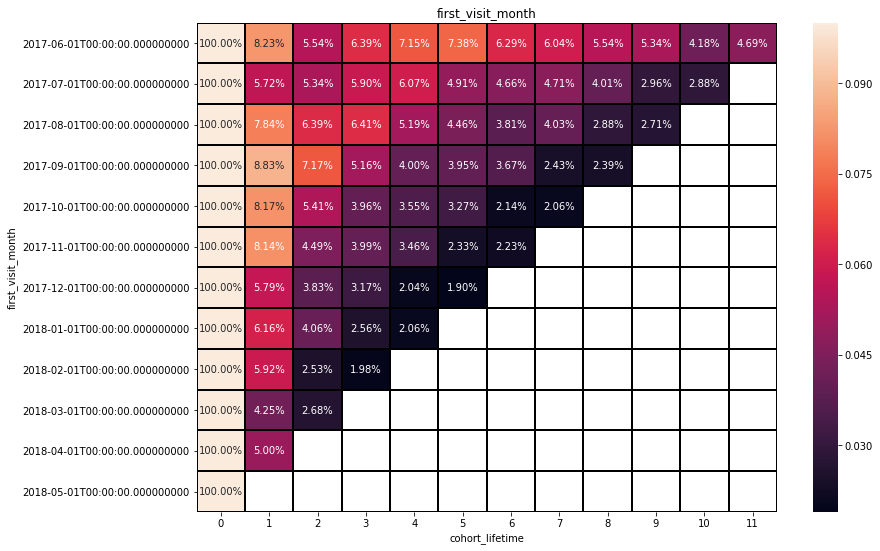

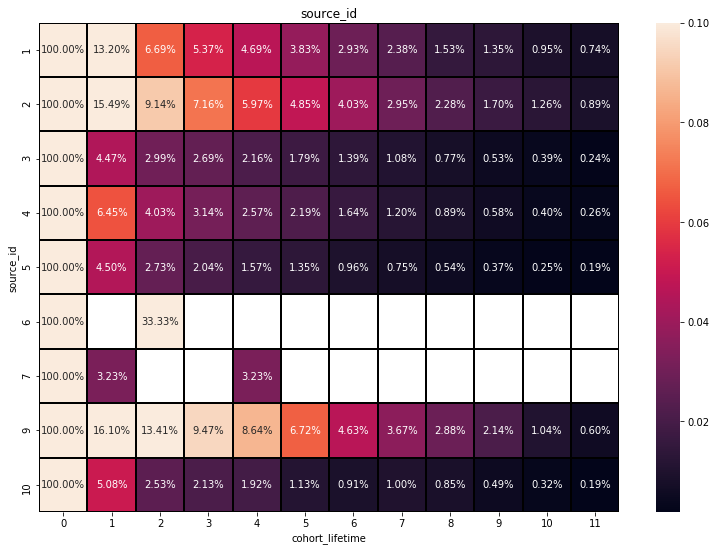

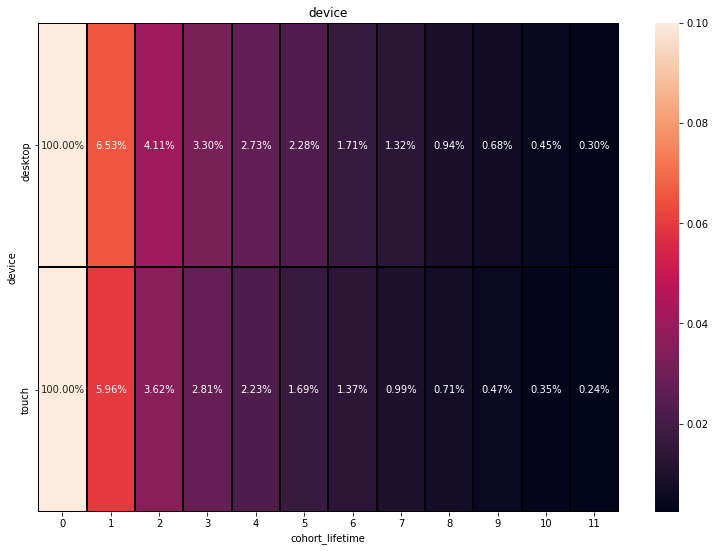

In [39]:
for argument in ['first_visit_month', 'source_id', 'device']:
    cohorts_ret = (visits_good_time.groupby([argument,'cohort_lifetime'])
               .agg({'uid':'nunique'}).reset_index()) #.rename(columns = {'uid': 'cohort_users'})
    initial_users_count = cohorts_ret[cohorts_ret['cohort_lifetime'] == 0][[argument,'uid']]
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}).reset_index()
    
    cohorts_ret = cohorts_ret.merge(initial_users_count, on=[argument])
    cohorts_ret['retention'] = (cohorts_ret['uid'] / cohorts_ret['cohort_users'])
    retention_pivot = cohorts_ret.pivot_table(index=[argument], 
                                          columns='cohort_lifetime', values='retention', aggfunc='sum')#.fillna('')

    #тепловая карта
    plt.figure(figsize=(13, 9))
    plt.title(argument)
    sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black', vmax=0.1)

### Вывод

Коэффициент удержания в абсолютных цифрах  низок - максимальное значение 8%, среднее - около 5%,<font color = 'purple'> плохо это или нет мы сказать не можем, пока не имеем аналогичных данных по конкурентам, но что точно плохо - что Retention rate со временем снижается до 1-2%!  <font color = 'black'>
Пользователей много, но они не возвращаются. Нужно обратить на это внимание и внедрять механизмы удержания - промо-рассылки, скидки на билеты и т.д.
Что касается источников, то наиболее эффективны 1, 2 и 9. Практически бесполезны 5 и 7.
Для пользователи десктопной версии удержание немного лучше, чем для мобильной.

#### Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

#### Первые покупки. Считаем время от первого визита до первой покупки.

In [40]:
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')
first_order_date = orders_log.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders_log = orders_log.join(first_order_date, on='uid')

orders_log['first_order_month'] = orders_log['first_order_date'].astype('datetime64[M]')
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [41]:
visits_orders = visits_log.merge(orders_log, on='uid', how='outer') #lsuffix='left_',

In [42]:
visits_orders['visit_order_delta'] = (visits_orders['first_order_date'] - visits_orders['first_visit_date']).dt.days

In [43]:
visits_orders.dropna(subset=['visit_order_delta'], inplace=True)

In [44]:
visits_orders.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_visit_date,buy_ts,revenue,order_month,first_order_date,first_order_month,visit_order_delta
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09 20:25:00,2018-03-01,0.0
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09 20:25:00,2018-03-01,0.0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-04 12:46:00,2017-09-01,0.0
7,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-10-01,2017-09-04 12:46:00,2017-09-01,0.0
8,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-10-01,2017-09-04 12:46:00,2017-09-01,0.0


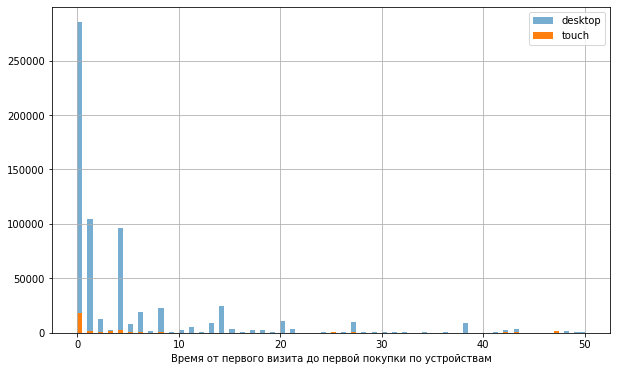

count    713192.000000
mean         14.729683
std          37.542444
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max         363.000000
Name: visit_order_delta, dtype: float64
count    48615.000000
mean        54.871315
std         76.463454
min          0.000000
25%          0.000000
50%          6.000000
75%        101.000000
max        362.000000
Name: visit_order_delta, dtype: float64


In [45]:
visits_orders[visits_orders['device'] == 'desktop']['visit_order_delta'].astype('int').hist(bins=100, label='desktop', figsize=(10,6), range=(0,50), alpha = 0.6);
visits_orders[visits_orders['device'] == 'touch']['visit_order_delta'].astype('int').hist(bins=100, label='touch', figsize=(10,6), range=(0,50));
plt.xlabel('Время от первого визита до первой покупки по устройствам')
plt.legend(loc='upper right')
plt.show()
print(visits_orders[visits_orders['device'] == 'desktop']['visit_order_delta'].describe())
print(visits_orders[visits_orders['device'] == 'touch']['visit_order_delta'].describe())

Практически половина пользователей совершают первую покупку в день своего первого захода на сервис. Люди знают зачем пришли! 3/4 хватает недели. Но есть и те, кому нужен год, чтобы решиться на первую покупку.

А вот пользователям мобильных устройств нужно больше времени, чтоб решиться.

##### Сколько раз покупают за период?

In [46]:
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [47]:
cohort_size_period = orders_log.groupby(['first_order_month']).agg({'buy_ts':'count'}).rename(columns = {'buy_ts': 'cohort_size'})
cohort_size_period['share'] = 1 / cohort_size_period['cohort_size']
cohort_size_period

,cohort_size,share
first_order_month,,
2017-06-01,4438,0.000225
2017-07-01,2910,0.000344
2017-08-01,2188,0.000457
2017-09-01,3878,0.000258
2017-10-01,6005,0.000167
2017-11-01,5900,0.000169
2017-12-01,5894,0.000170
2018-01-01,4308,0.000232
2018-02-01,4470,0.000224


In [48]:
orders_log_cohorts = orders_log.join(cohort_size_period, on='first_order_month')
orders_log_cohorts.head(3)

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month,cohort_size,share
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,4438,0.000225
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,4438,0.000225
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,4438,0.000225


In [49]:
cohort_buys_per_month = orders_log.pivot_table(index='first_order_month', columns='order_month', values='buy_ts', aggfunc='count').round()
cohort_buys_per_month.fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354,177,174,226,292,218,276,174,212,153,96,86,
2017-07-01,,2186,100,120,104,72,82,61,50,58,24,53,
2017-08-01,,,1533,108,100,81,85,62,49,78,46,46,
2017-09-01,,,,2933,219,161,164,67,109,108,56,61,
2017-10-01,,,,,4964,314,162,122,129,103,86,125,
2017-11-01,,,,,,4813,397,182,211,136,59,102,
2017-12-01,,,,,,,5052,270,202,179,86,105,
2018-01-01,,,,,,,,3783,224,159,64,78,
2018-02-01,,,,,,,,,4095,222,83,70,


Для каждой когорты наблюдаем большое число покупок в первый месяц использования сервиса, но со следующего месяца видим падение примерно в 20 раз, что коррелирует с полученным ранее  retention rate около 5%.

In [50]:
#считаем количество уникальных покупателей по месяцам
buyers_total = orders_log.groupby(['first_order_month']).agg({'uid':'nunique'}).rename(columns = {'uid': 'buyers_total'})
cohort_buys_per_month = buyers_total[['buyers_total']].join(cohort_buys_per_month)

#делим на количество покупателей
cohort_buys_per_month = cohort_buys_per_month.div(cohort_buys_per_month['buyers_total'], axis=0).drop(columns=['buyers_total'])

cohort_buys_per_month.fillna('')

,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00
first_order_month,,,,,,,,,,,,,
2017-06-01,1.16362,0.0874938,0.0860109,0.111715,0.14434,0.107761,0.136431,0.0860109,0.104795,0.0756303,0.0474543,0.0425111,
2017-07-01,,1.13677,0.0520021,0.0624025,0.0540822,0.0374415,0.0426417,0.0317213,0.026001,0.0301612,0.0124805,0.0275611,
2017-08-01,,,1.11898,0.0788321,0.0729927,0.0591241,0.0620438,0.0452555,0.0357664,0.0569343,0.0335766,0.0335766,
2017-09-01,,,,1.13638,0.0848508,0.0623789,0.0635413,0.0259589,0.0422317,0.0418442,0.021697,0.0236343,
2017-10-01,,,,,1.14378,0.0723502,0.0373272,0.0281106,0.0297235,0.0237327,0.0198157,0.0288018,
2017-11-01,,,,,,1.17937,0.0972801,0.0445969,0.051703,0.0333252,0.0144572,0.0249939,
2017-12-01,,,,,,,1.15264,0.0616016,0.0460872,0.0408396,0.0196213,0.0239562,
2018-01-01,,,,,,,,1.12155,0.0664097,0.047139,0.0189742,0.0231248,
2018-02-01,,,,,,,,,1.12161,0.0608053,0.0227335,0.0191728,


<font color='purple'> Впечатляет процент покупающих в первый месяц. Но куда потом это девается?

<font color='green'> Если смотреть на процент не от всех пользователей когорты, а только от активных покупателей, то картина выглядит немного по-другому. В первый месяц многие покупают больше одного раза, потом наблюдается такое же резкое падение, но 2-5% клиентов остаются с нами надолго. Это радует, но хорошо бы увеличить это число.

##### Какой средний чек?

In [51]:
visits_orders.head(3)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_visit_date,buy_ts,revenue,order_month,first_order_date,first_order_month,visit_order_delta
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09 20:25:00,2018-03-01,0.0
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-09 20:25:00,2018-03-01,0.0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-04 12:46:00,2017-09-01,0.0


In [52]:
for argument in ['source_id', 'device']:
    numbers_of_buyings = visits_orders.groupby([argument]).agg({'revenue':'count'})
    cohort_mean_bill = visits_orders.groupby([argument]).agg({'revenue':'sum'}) / numbers_of_buyings
    print(cohort_mean_bill)
    print()

             revenue
source_id           
1           9.242265
2          11.071013
3           6.344095
4           7.923842
5           7.781887
7           1.220000
9           3.806667
10          3.630303

           revenue
device            
desktop   9.040895
touch    10.579314



### Вывод
По среднему чеку - лидеры 1,2. А 9, который радовал нас высоким удержанием, плетется в хвосте. 
Немного выше чек с мобильных устройств.

##### Сколько денег приносят? (LTV)   (CAC)

In [53]:
#когорты
#DIMENSIONS = ['device']
#DIMENSIONS = ['source_id']
DIMENSIONS = ['source_id', 'device']

In [54]:
cohorts_ltv = users.groupby(DIMENSIONS).agg({'payer': 'sum', 'acquisition_cost': 'sum'}).rename(columns = {'payer': 'cohort_size'})
cohorts_ltv['cac'] = (cohorts_ltv['acquisition_cost'] / cohorts_ltv['cohort_size']).fillna('')

ltv = orders_log.set_index('uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                           'order_month', 'revenue']]
ltv['age_month'] = ((ltv['order_month'] - ltv['acquisition_month']) / np.timedelta64(1,'M')).round() #.astype('int')

#132 строки, где покупка совершена раньше чем был первый визит. Это ошибка, такого быть не может. 
#132 строки на массив 50 тысяч - незначительное число, отбросим их вместе с Nan (еще 606 строк)
ltv = ltv[ltv['age_month'] >= 0] 
ltv['age_month'] = ltv['age_month'].astype('int') 
ltv

,acquisition_month,source_id,device,order_month,revenue,age_month
uid,,,,,,
9224005701666002943,2017-12-01,5.0,desktop,2017-12-01,3.36,0
9224005701666002943,2017-12-01,5.0,desktop,2018-03-01,3.67,3
9225406053864431006,2017-09-01,4.0,desktop,2017-12-01,0.43,3
9225479525411867039,2018-02-01,4.0,touch,2018-02-01,7.33,0
9225594012261502815,2017-07-01,3.0,desktop,2017-07-01,4.89,0
...,...,...,...,...,...,...
9221059331469344216,2017-12-01,4.0,desktop,2017-12-01,0.98,0
9221809908447127809,2017-12-01,4.0,desktop,2017-12-01,1.34,0
9222179515197516675,2018-02-01,1.0,desktop,2018-02-01,2.20,0


In [55]:
ltv = ltv.groupby(DIMENSIONS + ['age_month']).agg({'revenue': 'sum'})
ltv = pd.pivot_table(ltv, index=DIMENSIONS, columns='age_month', values='revenue', aggfunc='sum' )
ltv = ltv.cumsum(axis = 1)
ltv

age_month                0         1         2         3         4         5   \
source_id device                                                                
1.0       desktop  12182.34  14688.45  16330.95  18470.77  19995.99  20941.39   
          touch     2571.31   2825.47   2946.95   3258.53   3338.71   3506.62   
2.0       desktop  14227.45  18352.66  23895.87  30759.12  33628.84  35849.96   
          touch     3602.75   5319.20   5822.79   5978.19   6213.64   6363.05   
3.0       desktop  31734.65  36511.34  38408.59  40116.07  41706.54  42583.62   
          touch     5527.82   6353.79   6758.40   7131.10   7297.45   7459.68   
4.0       desktop  28711.12  31686.21  33143.77  34634.94  35957.87  37591.30   
          touch     8440.54   9613.43  10223.45  10650.79  11035.42  11497.17   
5.0       desktop  24839.98  27560.68  29138.05  40090.99  41817.11  43850.85   
          touch     3984.80   4538.01   4824.55   4988.28   5153.71   5316.05   
7.0       desktop      1.22       NaN       NaN       NaN       NaN       NaN   
9.0       desktop   1989.96   2496.11   2971.82   3380.78   3739.28   3937.06   
          touch      395.36    519.01    605.71    701.85    781.22    793.75   
10.0      desktop   2899.99   3207.50   3411.05   3475.94   3598.33   3639.72   
          touch      651.34    714.10    737.75    757.98    789.32    819.88   

age_month                6         7         8         9         10        11  
source_id device                                                               
1.0       desktop  21677.71  23070.48  23673.35  24386.48  25191.78  25643.96  
          touch     3558.23   4249.79   4758.81   4815.21   4827.24   4898.13  
2.0       desktop  36931.19  37627.76  38272.11  39210.91  39853.09  40171.54  
          touch     6464.98   6490.24   6582.01   6604.87   6649.96   6691.40  
3.0       desktop  43339.59  43723.80  44088.82  44289.48  44414.62  44471.24  
          touch     7657.37   7785.28   7890.49   7956.24   7972.30   8018.63  
4.0       desktop  39306.77  39775.57  40556.03  41212.87  41818.30  42121.23  
          touch    11825.03  12047.61  12186.26  12875.40  13054.96  13105.60  
5.0       desktop  44984.75  45945.13  46563.32  47432.97  47568.47  47644.34  
          touch     5448.70   5526.20   5576.44   5609.73   5614.98   5628.24  
7.0       desktop       NaN       NaN       NaN       NaN       NaN       NaN  
9.0       desktop   4143.21   4317.27   4566.75   4704.14   4741.72   4756.32  
          touch      798.64    813.85    826.24    848.49    869.14    870.06  
10.0      desktop   3695.73   3719.26   3723.17   3735.32   3751.70   3760.80  
          touch      829.34    831.78    832.15    837.69       NaN       NaN

In [56]:
ltv = cohorts_ltv[['cohort_size']].join(ltv)
#делим на размер когорты
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns=['cohort_size'])
#cac_ltv = cohorts_ltv[['cohort_size', 'cac']].join(ltv.fillna(''))
ltv = ltv.fillna('')
cohorts_ltv

cohort_size  acquisition_cost      cac
source_id device                                         
1         desktop       2321.0      14014.043424  6.03793
          touch          648.0       6819.226576  10.5235
2         desktop       2664.0      28653.388163  10.7558
          touch          845.0      14152.651837  16.7487
3         desktop       8503.0     107719.424811  12.6684
          touch         1680.0      33602.205189  20.0013
4         desktop       7763.0      40274.342880  5.18799
          touch         2303.0      20799.257120  9.03138
5         desktop       5656.0      38308.245002  6.77303
          touch         1189.0      13448.154998  11.3105
6         desktop          0.0          0.000000         
7         desktop          1.0          0.000000        0
          touch            0.0          0.000000         
9         desktop        893.0       4065.386536   4.5525
          touch          193.0       1379.413464  7.14722
10        desktop       1028.0       4141.153558  4.02836
          touch          274.0       1679.966442  6.13126

In [57]:
ltv

0        1        2        3        4        5   \
source_id device                                                          
1         desktop  5.24875   6.3285  7.03617  7.95811  8.61525  9.02257   
          touch    3.96807  4.36029  4.54776   5.0286  5.15233  5.41145   
2         desktop  5.34063  6.88914  8.96992  11.5462  12.6234  13.4572   
          touch    4.26361  6.29491  6.89088  7.07478  7.35342  7.53024   
3         desktop  3.73217  4.29394  4.51706  4.71787  4.90492  5.00807   
          touch    3.29037  3.78202  4.02286   4.2447  4.34372  4.44029   
4         desktop  3.69846   4.0817  4.26945  4.46154  4.63196  4.84237   
          touch    3.66502  4.17431  4.43919  4.62475  4.79176  4.99226   
5         desktop  4.39179  4.87282  5.15171  7.08822  7.39341  7.75298   
          touch    3.35139  3.81666  4.05765  4.19536  4.33449  4.47103   
6         desktop                                                         
7         desktop     1.22                                                
          touch                                                           
9         desktop   2.2284   2.7952  3.32791  3.78587  4.18732   4.4088   
          touch     2.0485  2.68917  3.13839  3.63653  4.04777  4.11269   
10        desktop    2.821  3.12014  3.31814  3.38126  3.50032  3.54058   
          touch    2.37715   2.6062  2.69252  2.76635  2.88073  2.99226   

                        6        7        8        9        10       11  
source_id device                                                         
1         desktop  9.33981  9.93989  10.1996  10.5069  10.8538  11.0487  
          touch     5.4911  6.55832  7.34384  7.43088  7.44944  7.55884  
2         desktop  13.8631  14.1245  14.3664  14.7188  14.9599  15.0794  
          touch    7.65086  7.68076  7.78936  7.81641  7.86978  7.91882  
3         desktop  5.09698  5.14216  5.18509  5.20869  5.22341  5.23006  
          touch    4.55796   4.6341  4.69672  4.73586  4.74542  4.77299  
4         desktop  5.06335  5.12374  5.22427  5.30888  5.38687   5.4259  
          touch    5.13462  5.23127  5.29147  5.59071  5.66868  5.69066  
5         desktop  7.95346  8.12325  8.23255  8.38631  8.41027  8.42368  
          touch    4.58259  4.64777  4.69003  4.71802  4.72244  4.73359  
6         desktop                                                        
7         desktop                                                        
          touch                                                          
9         desktop  4.63965  4.83457  5.11394  5.26779  5.30988  5.32623  
          touch    4.13803  4.21684  4.28104  4.39632  4.50332  4.50808  
10        desktop  3.59507  3.61796  3.62176  3.63358  3.64951  3.65837  
          touch    3.02679  3.03569  3.03704  3.05726

In [58]:
ltv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17 entries, (1, desktop) to (10, touch)
Data columns (total 12 columns):
0     17 non-null object
1     17 non-null object
2     17 non-null object
3     17 non-null object
4     17 non-null object
5     17 non-null object
6     17 non-null object
7     17 non-null object
8     17 non-null object
9     17 non-null object
10    17 non-null object
11    17 non-null object
dtypes: object(12)
memory usage: 2.5+ KB


In [59]:
ltv.loc[1, 'desktop'][5]

9.0225721671693

##### Вывод
1 и 2й источники по-прежнему в лидерах, причем для обеих платформ. Хотя пользователи десктопной версии приносят больше денег, для источника 2 -аж в 2 раза. Но и для других источников настольные компьютеры приносят больше денег, за исключением источника 4, где у умобильной версии незначительное преимущество.

In [60]:
cohorts_ltv_total = users.groupby('acquisition_month').agg({'payer': 'sum'}).rename(columns = {'payer': 'cohort_size'})

ltv_total = orders_log.set_index('uid').join(users, how='left')[['acquisition_month', 'order_month', 'revenue']]
ltv_total['age_month'] = ((ltv_total['order_month'] - ltv_total['acquisition_month']) / np.timedelta64(1,'M')).round() #.astype('int')
ltv_total = ltv_total[ltv_total['age_month'] >= 0] 
ltv_total['age_month'] = ltv_total['age_month'].astype('int') 

ltv_total = pd.pivot_table(ltv_total, index='acquisition_month', columns='age_month', values='revenue', aggfunc='sum') #.reset_index()
ltv_total = ltv_total.cumsum(axis = 1)

ltv_total = cohorts_ltv_total[['cohort_size']].join(ltv_total)
#делим на размер когорты
ltv_total = ltv_total.div(ltv_total['cohort_size'], axis=0).drop(columns=['cohort_size'])

ltv_total = ltv_total.fillna('')
ltv_total.reset_index()

,acquisition_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,3.360000,4.274448,4.77404,6.13162,7.42752,8.38237,9.59414,10.3737,11.1915,12.4249,13.1888,13.7097
1,2017-07-01,4.119315,4.558069,5.01321,5.49619,5.88683,6.22775,6.49523,6.79399,7.08232,7.34115,7.55635,
2,2017-08-01,3.729100,4.323359,4.9311,5.44725,5.92912,6.22884,6.47487,7.21755,7.70071,7.91858,,
3,2017-09-01,4.057735,5.253794,5.92631,9.39641,9.8234,10.4547,10.7605,10.9246,11.0561,,,
4,2017-10-01,3.991632,4.783432,5.05883,5.28001,5.48526,5.66858,5.78409,5.92406,,,,
5,2017-11-01,3.959272,4.589305,4.90049,5.2307,5.47848,5.63078,5.78217,,,,,
6,2017-12-01,4.153478,4.573366,5.61622,6.87935,7.26177,7.69648,,,,,,
7,2018-01-01,3.441306,4.046879,4.41833,4.51145,4.67795,,,,,,,
8,2018-02-01,3.603795,4.192562,4.40192,4.77795,,,,,,,,
9,2018-03-01,4.274749,4.611330,4.87817,,,,,,,,,


In [74]:
#LTV за полгода для когорт, которые прожили как минимум 6 месяцев
ltv_total[5]

acquisition_month
2017-06-01    8.38237
2017-07-01    6.22775
2017-08-01    6.22884
2017-09-01    10.4547
2017-10-01    5.66858
2017-11-01    5.63078
2017-12-01    7.69648
2018-01-01           
2018-02-01           
2018-03-01           
2018-04-01           
2018-05-01           
Name: 5, dtype: object

#### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника? (CAC)
- На сколько окупились расходы? (ROI)

In [62]:
#Всего
costs['costs'].sum()

329131.62

In [63]:
#По источникам
cohort_costs_per_source = costs.groupby(['source_id']).agg({'costs':'sum'})
cohort_costs_per_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [64]:
#По времени
costs['acquisition_month'] = costs['acquisition_date'].astype('datetime64[M]')
cohort_costs_per_month = costs.groupby(['acquisition_month']).agg({'costs':'sum'})
cohort_costs_per_month

,costs
acquisition_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


#### Вывод
Оказывается, больше всего (почти половина маркетингового бюджета) потрачено на источник №3, у которого довольно средненькие  показатели и по ltv, и по удержанию. А наши чемпионы по этим показателям - источники 1 и 2 даже не входят в тройку. Кажется, нужно больше денег выделять на эти источники. И сделать это можно за счет источника 3, который не оправдывает вливаний.
От финансирования источников 6, 7 и 8, похоже, уже отказались. 
Что касается трат по месяцам, распределение выглядит адекватным - в горячие зимние месяцы тратим больше, в мертвый летний сезон - меньше. Хотя, возможно тут у нас спутаны причина и следствие - то есть, если больше потратить на маркетинг летом, то больше и заработаем?

#### Сколько стоило привлечение одного покупателя из каждого источника? (CAC)

In [65]:
cohorts_ltv[['cac']]

cac
source_id device          
1         desktop  6.03793
          touch    10.5235
2         desktop  10.7558
          touch    16.7487
3         desktop  12.6684
          touch    20.0013
4         desktop  5.18799
          touch    9.03138
5         desktop  6.77303
          touch    11.3105
6         desktop         
7         desktop        0
          touch           
9         desktop   4.5525
          touch    7.14722
10        desktop  4.02836
          touch    6.13126

#### Вывод
3й источник, на который тратим почти половину бюджета, еще и дороже всего обходится! Потом идут 2й и 1й. 4й, который приносит больше всего посещений, обходится дешевле всех, из главных источников.

##### насколько окупились расходы? (ROI)

In [66]:
profile_roi = orders_log.set_index('uid').join(users, how='left')[['acquisition_month', 'source_id', 'device', 
                                                           'order_month', 'revenue']]

Так как нас интересуют только когорты с началом жизни с июня по декабрь 2017, из этой таблицы нам нужно выкинуть строки с acquisition_month начиная с января 2018, а также строки, с возрастом покупки больше 6 месяцев.

In [67]:
profile_roi['age'] = ((profile_roi['order_month'] - profile_roi['acquisition_month'])/ np.timedelta64(1,'M')).round()
profile_roi = profile_roi[profile_roi['age'] >= 0] 
profile_roi['age'] = profile_roi['age'].astype('int') 


In [68]:
profile_roi = profile_roi[(profile_roi['age'] < 6) & (profile_roi['acquisition_month'] < '2018-01-01')] 
profile_roi.head()

,acquisition_month,source_id,device,order_month,revenue,age
uid,,,,,,
9224005701666002943,2017-12-01,5.0,desktop,2017-12-01,3.36,0
9224005701666002943,2017-12-01,5.0,desktop,2018-03-01,3.67,3
9225406053864431006,2017-09-01,4.0,desktop,2017-12-01,0.43,3
9225594012261502815,2017-07-01,3.0,desktop,2017-07-01,4.89,0
9225769845961911267,2017-09-01,5.0,desktop,2017-09-01,2.75,0


Теперь надо из таблицы costs откинуть все расходы,  сделанные в январе 2018 и позже.

In [69]:
costs_2017 = costs[costs['acquisition_month'] < '2018-01-01']

cohort_costs_per_source_roi = costs_2017.groupby(['source_id']).agg({'costs':'sum'})
cohort_costs_per_month_roi = costs_2017.groupby(['acquisition_month']).agg({'costs':'sum'})

cohort_costs_per_month_roi

,costs
acquisition_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35


In [70]:
# По источнику
roi_per_source = profile_roi.groupby('source_id').agg({'revenue': 'sum'}).rename(columns={'revenue': 'ltv'})
roi_per_source = roi_per_source.join(cohort_costs_per_source_roi, how='left')
roi_per_source['roi'] = (roi_per_source['ltv'] - roi_per_source['costs']) / roi_per_source['costs']
roi_per_source

,ltv,costs,roi
source_id,,,
1.0,18261.04,11754.42,0.553547
2.0,32584.04,24547.68,0.327378
3.0,33296.87,80495.21,-0.586350
4.0,31642.28,34944.28,-0.094493
5.0,38189.50,29613.94,0.289578
7.0,1.22,NaN,NaN
9.0,3828.82,3202.88,0.195430
10.0,2669.87,3402.74,-0.215376


1й и 2й источники отрабатывают свои денежки! А вот самый затратный №3 также и самый убыточный. С ним явно надо что-то делать.Также в небольшом, но плюсе №5 и №9. 

In [71]:
# По месяцам
roi_per_month = profile_roi.groupby('order_month').agg({'revenue': 'sum'}).rename(columns={'revenue': 'ltv'})
roi_per_month = roi_per_month.join(cohort_costs_per_month_roi, how='left')
roi_per_month['roi'] = (roi_per_month['ltv'] - roi_per_month['costs']) / roi_per_month['costs']
roi_per_month

,ltv,costs,roi
order_month,,,
2017-06-01,9374.40,18015.00,-0.479634
2017-07-01,12408.83,18240.59,-0.319713
2017-08-01,8660.21,14790.54,-0.414476
2017-09-01,18048.74,24368.91,-0.259354
2017-10-01,27692.62,36322.88,-0.237598
2017-11-01,26641.69,37907.88,-0.297199
2017-12-01,32602.54,38315.35,-0.149100
2018-01-01,5781.11,NaN,NaN
2018-02-01,8401.74,NaN,NaN


Да, пока что все месяцы у нас убыточны, но видна тенденция роста, за полгода убытки уменьшились втрое, еще максимум полгода, и мы должны выйти в плюс. А если грамотно скорректируем реламный бюджет, то и раньше!

In [72]:
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,first_purchase_dt,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-09-11 00:06:00,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.634783,NaT,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-06-01 09:23:00,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.634783,2017-06-01 16:47:00,True
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.634783,NaT,False


In [73]:
# По устройствам
#так же фильтруем clients - выкидываем строки с acquisition_month начиная с января 2018
costs_per_device = users[users['acquisition_month'] < '2018-01-01'].groupby('device').agg({'acquisition_cost':'sum'})  #[users['acquisition_month'] < '2018-01-01']

roi_per_device = profile_roi.groupby('device').agg({'revenue': 'sum'}).rename(columns={'revenue': 'ltv'})
roi_per_device['roi'] = (roi_per_device['ltv'] - costs_per_device['acquisition_cost']) / costs_per_device['acquisition_cost']
#costs_per_device
roi_per_device

,ltv,roi
device,,
desktop,136546.79,-0.007198
touch,23926.85,-0.525126


Тратим на привлечение клиента для мобильных устройства больше, убыток от них больше тоже. Но деваться некуда - за ними будущее.

## Вывод

Самый большой приток пользователей обеспечивают источники 4 и 3. Но при этом они убыточны, дают маленький ltv и удержание. Но, если с учетом нашей тенденции к общему росту, еще можно ожидать, что источник 4 вскоре выйдет в плюс из  своего roi -0.09, то для источника 3 с его roi=-0.58 на это рассчитывать не приходится. У источника 3, помимо этого, и самые дорогие клиенты - 12,7 для десктопа и 20(!) для мобильного. И на него мы тратим почти половину своего бюджета (141 тысячу из 329ти). На мой взгляд эту долю надо сильно сокращать. Возможно, стоит сократить и долю источника №4. Он выглядит перспективнее 3го, но убыточен, хотя клиенты по этому источнику дешевы и их много.

А потратить осовободившийся бюджет следует на источники 1, 2, 5. Они показывают самый высокий roi, самый высокий ltv и коэффициент удержания. 9й в плюсе, но уж больно низкий средний чек.

Десктопная версия сейчас обходится дешевле, а приносит денег больше. С точки зрения здесь и сейчас - вкладывать надо в десктоп. За мобильными устройствами, конечно, будущее, но похоже, что все-таки выбирать билеты удобнее на устройстве с большим монитором, на котором можно видеть сразу несколько мероприятий, да и схему зрительного зала удобней просматривать, выбирая билеты. Кроме того, десктоп предпочтительней, потому что, согласно нашим данным, клиенты очень часто испьзуют свои рабочие компьютеры и ноутбуки для бронирования билетов.

Еще бы отметил низкий retention rate, который резко (до 5%) снижается на второй месяц пользования сервисом и продолжает падать за год до 1-2%. При этом 70-80% делают покупки в первый месяц, как попадают на сервис, и даже не раз, но потом...
Сейчас мы получаем 2-3% лояльных клиентов с каждой когорты, нужно пытаться увеличить это число. 
Нужно больше вкладываться в удержание пользователей. Возможно стоит ввести систему накопления баллов, скидок на следующие покупки и т.д.

Сейчас картина такая, что у нас низкий сезон летом и высокий зимой. Интересно, можно ли изменить эту картину, если увеличить рекламные бюджеты на летние месяцы?